##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [ ]:
model.summary()

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

### Evaluate the model



Тест 1 (Изображение 3)


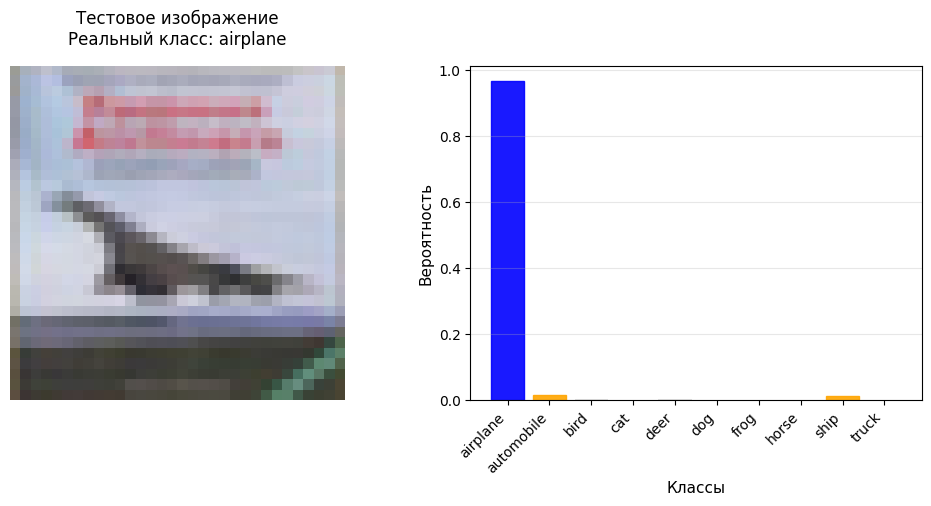

Результаты:
Реальный класс: airplane
Предсказанный класс: airplane
Уверенность модели: 0.964
Статус: Правильно

Топ-3 предсказания:
airplane: 0.964
automobile: 0.016
ship: 0.013


Тест 2 (Изображение 7)


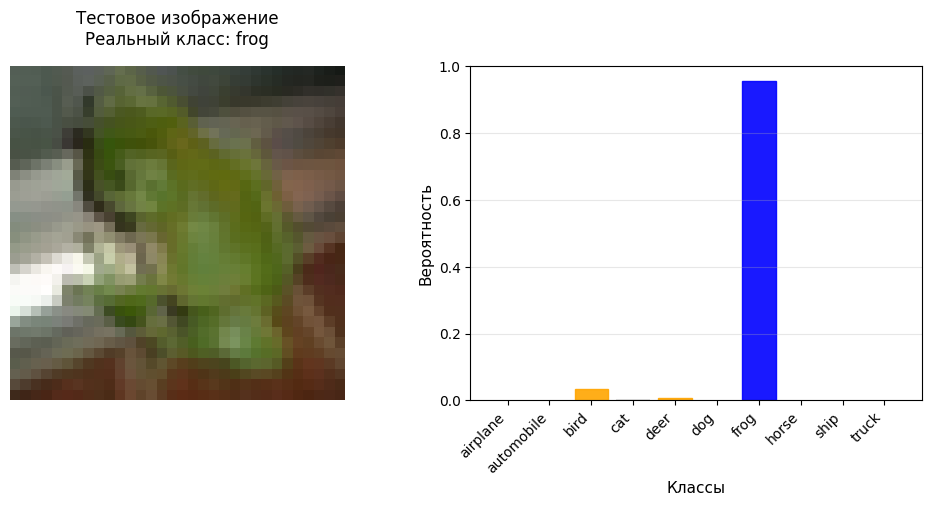

Результаты:
Реальный класс: frog
Предсказанный класс: frog
Уверенность модели: 0.955
Статус: Правильно

Топ-3 предсказания:
frog: 0.955
bird: 0.033
deer: 0.006


Тест 3 (Изображение 18)


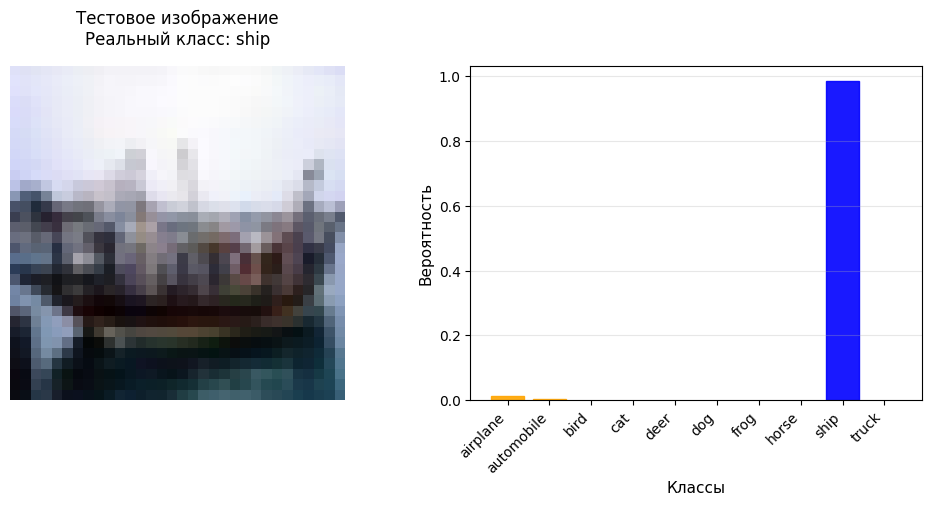

Результаты:
Реальный класс: ship
Предсказанный класс: ship
Уверенность модели: 0.984
Статус: Правильно

Топ-3 предсказания:
ship: 0.984
airplane: 0.012
automobile: 0.003


Тест 4 (Изображение 43)


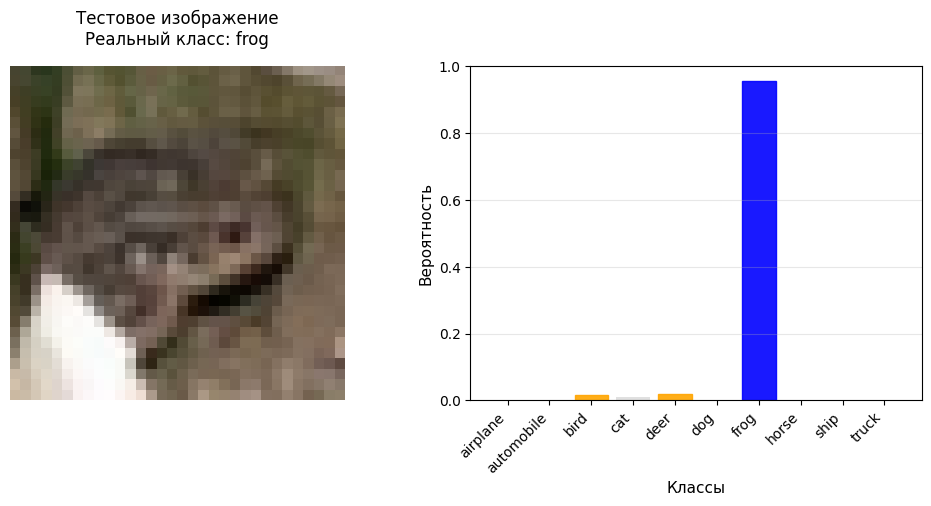

Результаты:
Реальный класс: frog
Предсказанный класс: frog
Уверенность модели: 0.955
Статус: Правильно

Топ-3 предсказания:
frog: 0.955
deer: 0.018
bird: 0.016


Тест 5 (Изображение 111)


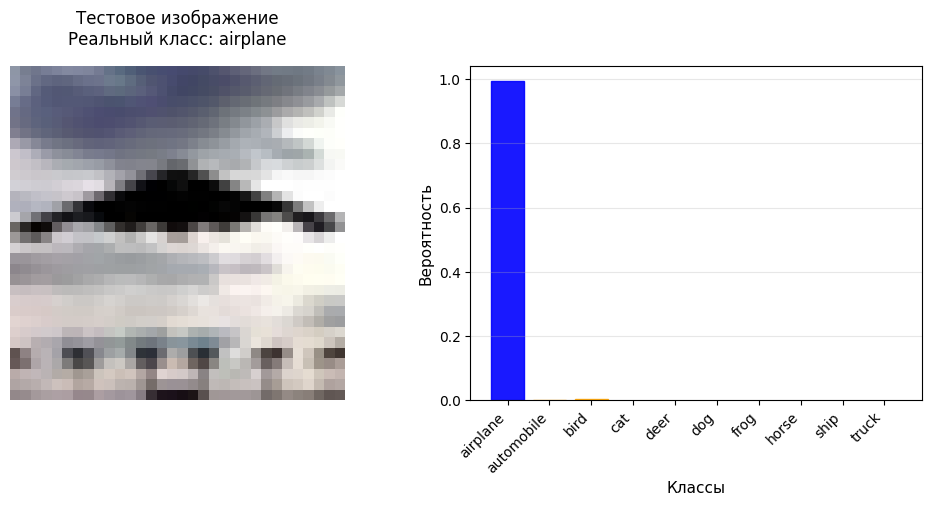

Результаты:
Реальный класс: airplane
Предсказанный класс: airplane
Уверенность модели: 0.993
Статус: Правильно

Топ-3 предсказания:
airplane: 0.993
bird: 0.003
automobile: 0.002


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def analyze_single_prediction(model, image, true_label, class_names):
    image_batch = np.expand_dims(image, axis=0)

    predictions = model.predict(image_batch, verbose=0)

    probabilities = tf.nn.softmax(predictions[0]).numpy()

    top3_indices = np.argsort(probabilities)[-3:][::-1]
    top3_probs = probabilities[top3_indices]

    predicted_class = np.argmax(probabilities)
    predicted_prob = probabilities[predicted_class]

    true_class = true_label[0] if isinstance(true_label, np.ndarray) else true_label

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Тестовое изображение\nРеальный класс: {class_names[true_class]}',
              fontsize=12, pad=15)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    bars = plt.bar(range(10), probabilities, color='lightgray', alpha=0.7)
    plt.xlabel('Классы', fontsize=11)
    plt.ylabel('Вероятность', fontsize=11)
    plt.xticks(range(10), class_names, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    bars[predicted_class].set_color('red')
    bars[true_class].set_color('blue')

    for i, idx in enumerate(top3_indices):
        bars[idx].set_alpha(0.9)
        if idx != predicted_class and idx != true_class:
            bars[idx].set_color('orange')

    plt.tight_layout()
    plt.show()

    print(f"Результаты:")
    print(f"Реальный класс: {class_names[true_class]}")
    print(f"Предсказанный класс: {class_names[predicted_class]}")
    print(f"Уверенность модели: {predicted_prob:.3f}")
    print(f"Статус: {'Правильно' if predicted_class == true_class else 'Неправильно'}")

    print("\nТоп-3 предсказания:")
    for i, (idx, prob) in enumerate(zip(top3_indices, top3_probs)):
        print(f"{class_names[idx]}: {prob:.3f}")

    return predicted_class, probabilities, top3_indices

test_indices = [3, 7, 18, 43, 111]

for i, idx in enumerate(test_indices):
    print(f"\n\nТест {i+1} (Изображение {idx})")

    image = test_images[idx]
    true_label = test_labels[idx]

    predicted_class, probabilities, top3 = analyze_single_prediction(
        model, image, true_label, class_names
    )

In [ ]:
print(test_acc)

Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.